In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/tdcsfog'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/tdcsfog/a171e61840.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/tdcsfog/4171ea3a0c.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/tdcsfog/0f985a8440.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/tdcsfog/5d320ade20.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/tdcsfog/ae8c67086b.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/tdcsfog/b7214cbf21.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/tdcsfog/e18fcafee8.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/tdcsfog/79568b8e25.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/tdcsfog/feba449e1a.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/tdcsfog/7ebad45aec.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/tdcsfog/d9bf33ecd9.csv
/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/tdc

In [2]:
# Dataset with only Turn event
df_1 = pd.read_csv("/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/tdcsfog/1620f0ce71.csv")

# Dataset with Turning and Walking event
df_2 = pd.read_csv("/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/tdcsfog/2ca9bd3533.csv")

# Dataset with Start Hesitation, Turning, and Walking event
df_3 = pd.read_csv("/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/tdcsfog/2365c918c9.csv")


In [3]:
print(df_1.head())
print(df_2.head())
print(df_3.head())

   Time      AccV     AccML     AccAP  StartHesitation  Turn  Walking
0     0 -9.759666  0.228907 -1.617085                0     0        0
1     1 -9.765859  0.231202 -1.621572                0     0        0
2     2 -9.766437  0.232144 -1.631195                0     0        0
3     3 -9.764910  0.235953 -1.632660                0     0        0
4     4 -9.768350  0.242539 -1.639417                0     0        0
   Time      AccV     AccML     AccAP  StartHesitation  Turn  Walking
0     0 -9.531056 -0.871463 -1.097661                0     0        0
1     1 -9.531755 -0.867726 -1.080375                0     0        0
2     2 -9.540378 -0.883152 -1.064349                0     0        0
3     3 -9.530864 -0.894170 -1.066212                0     0        0
4     4 -9.538012 -0.889935 -1.064343                0     0        0
   Time      AccV     AccML     AccAP  StartHesitation  Turn  Walking
0     0 -8.958139  0.919585 -3.330112                0     0        0
1     1 -8.951679  0

In [4]:
def basic_stats(df):
    stats = {}
    for col in ["AccV", "AccML", "AccAP"]:
        stats[col] = {
            "mean": df[col].mean(),
            "std": df[col].std(),
            "min": df[col].min(),
            "max": df[col].max(),
            "median": df[col].median(),
            "q25": df[col].quantile(0.25),
            "q75": df[col].quantile(0.75),
        }
    return pd.DataFrame(stats)

In [5]:
overall_stats_1 = basic_stats(df_1)
print("Overall Stats in df_1:\n", overall_stats_1)

overall_stats_2 = basic_stats(df_2)
print("Overall Stats in df_2:\n", overall_stats_2)

overall_stats_3 = basic_stats(df_3)
print("Overall Stats in df_3:\n", overall_stats_3)

Overall Stats in df_1:
              AccV     AccML     AccAP
mean    -9.304343  0.529132  2.355970
std      0.796984  0.869112  1.858933
min    -16.443034 -3.898348 -5.937221
max     -6.154297  3.709977  6.688166
median  -9.304154  0.336958  2.932952
q25     -9.724362 -0.093838  2.321973
q75     -8.905315  1.163550  3.294612
Overall Stats in df_2:
              AccV     AccML     AccAP
mean    -9.538676  0.297170  0.792499
std      1.092450  1.067562  1.442435
min    -19.826037 -5.237835 -8.102094
max     -4.081438  6.887094  7.567450
median  -9.536657  0.346953  0.986823
q25     -9.877330 -0.731758 -0.082484
q75     -9.139962  1.099942  1.503831
Overall Stats in df_3:
              AccV     AccML     AccAP
mean    -9.426684  0.659779  1.410638
std      0.952258  0.995977  1.743759
min    -17.189945 -4.425004 -4.189376
max     -5.664075  5.490903  6.874368
median  -9.367482  0.583337  1.594492
q25     -9.770047  0.134239  1.000108
q75     -8.946815  1.194803  2.351878


In [6]:
def plot_fog_events_overlay(df, title):
    """
    Plot accelerometer signals with FoG events shaded directly on the same graph.
    """
    # Convert timestamps to seconds
    df["Time_sec"] = df["Time"] / 128.0  
    
    fig, ax = plt.subplots(figsize=(14, 6))
    
    # Plot all 3 accelerometer signals
    ax.plot(df["Time_sec"], df["AccV"], label="AccV (Vertical)", alpha=0.7)
    ax.plot(df["Time_sec"], df["AccML"], label="AccML (Medio-Lateral)", alpha=0.7)
    ax.plot(df["Time_sec"], df["AccAP"], label="AccAP (Antero-Posterior)", alpha=0.7)
    
    # Shade event regions
    colors = {
        "Turn": "green",
        "Walking": "blue",
        "StartHesitation": "red"
    }
    
    for event, color in colors.items():
        if event in df.columns:
            # Find contiguous segments where event == 1
            in_event = False
            start_time = None
            for t, val in zip(df["Time_sec"], df[event]):
                if val == 1 and not in_event:
                    in_event = True
                    start_time = t
                elif val == 0 and in_event:
                    in_event = False
                    ax.axvspan(start_time, t, color=color, alpha=0.2, label=event)
            # If event lasts until the end
            if in_event:
                ax.axvspan(start_time, df["Time_sec"].iloc[-1], color=color, alpha=0.2, label=event)
    
    ax.set_title(title)
    ax.set_xlabel("Time (seconds)")
    ax.set_ylabel("Acceleration (m/s^2)")
    ax.legend()
    plt.show()

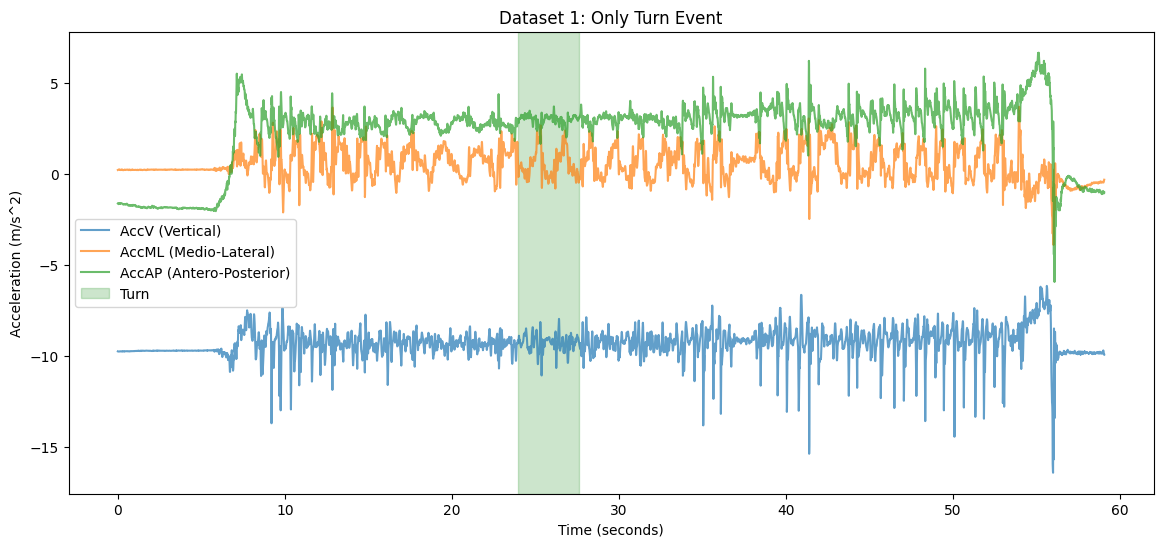

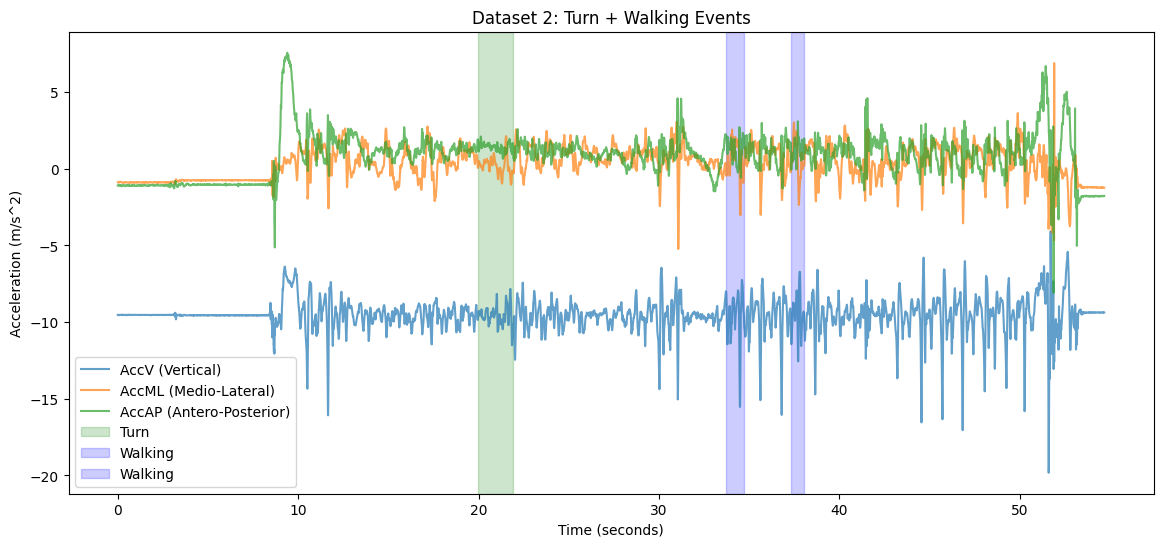

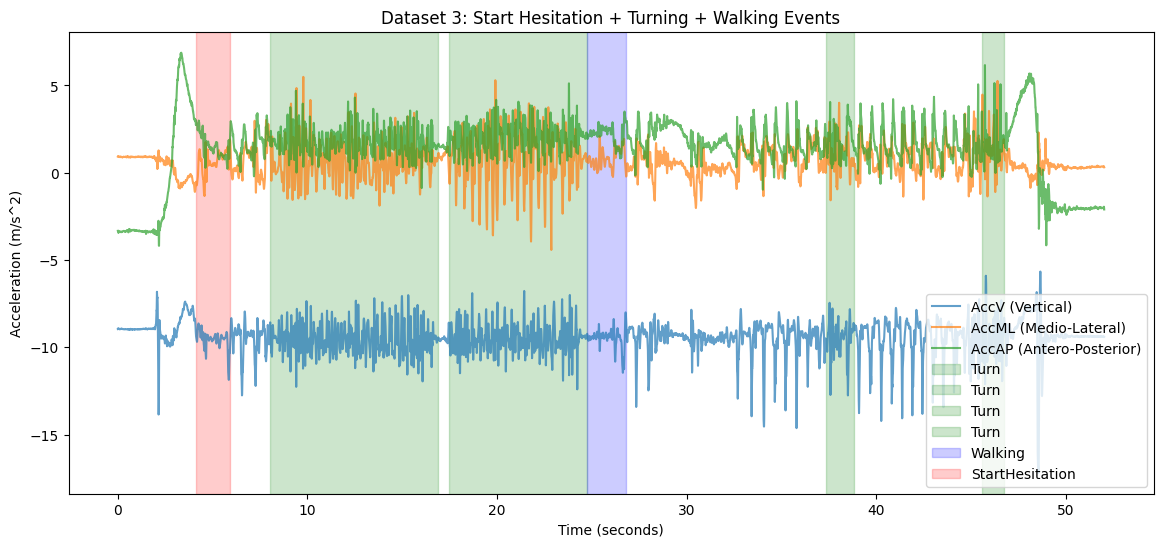

In [7]:
# Plotting all the datasets
plot_fog_events_overlay(df_1, "Dataset 1: Only Turn Event")
plot_fog_events_overlay(df_2, "Dataset 2: Turn + Walking Events")
plot_fog_events_overlay(df_3, "Dataset 3: Start Hesitation + Turning + Walking Events")

In [8]:
def _find_segments(time, series):
    """Return list of (start, end) for contiguous 1s in a boolean/int series."""
    s = series.fillna(0).astype(int)
    segs, in_evt, start = [], False, None
    for t, v in zip(time, s):
        if v and not in_evt:
            in_evt, start = True, t
        elif not v and in_evt:
            in_evt, segs = False, segs + [(start, t)]
    if in_evt:
        segs.append((start, float(time.iloc[-1])))
    return segs

def plot_zoomed_all_events(
    df,
    events=("StartHesitation", "Turn", "Walking"),
    fs=128.0,
    pad_seconds=None,
    pad_fraction=0.12,
    show_all_events_in_window=True,   # also shade other events within the zoom window
    title_prefix="Zoomed event view"
):
    """
    For each event column in `events`, find its 1-runs (segments) and create a zoomed plot
    around each segment. If `show_all_events_in_window` is True, other events are shaded too.
    """
    # Time axis
    time = df["Time"] / fs if "Time_sec" not in df.columns else df["Time_sec"]

    # Colors to match your overlay
    colors = {"Turn": "green", "Walking": "blue", "StartHesitation": "red"}

    # Precompute segments for every event present
    event_segs = {}
    for ev in events:
        if ev in df.columns:
            segs = _find_segments(time, df[ev])
            if segs:
                event_segs[ev] = segs

    if not event_segs:
        raise ValueError("No event segments found for the requested columns.")

    for ev, segs in event_segs.items():
        ev_color = colors.get(ev, "gray")

        for i, (start, end) in enumerate(segs, 1):
            duration = end - start
            pad = (max(duration * pad_fraction, 0.25)
                   if pad_seconds is None else pad_seconds)

            left  = max(float(time.iloc[0]), start - pad)
            right = min(float(time.iloc[-1]), end   + pad)

            fig, ax = plt.subplots(figsize=(14, 6))
            # Signals
            ax.plot(time, df["AccV"],  label="AccV (Vertical)",          alpha=0.7)
            ax.plot(time, df["AccML"], label="AccML (Medio-Lateral)",    alpha=0.7)
            ax.plot(time, df["AccAP"], label="AccAP (Antero-Posterior)", alpha=0.7)

            # Shade the selected event segment
            ax.axvspan(start, end, color=ev_color, alpha=0.2, label=ev)

            # Optionally also shade other events that overlap the zoom window
            if show_all_events_in_window:
                for other_ev, other_segs in event_segs.items():
                    if other_ev == ev:
                        continue
                    other_color = colors.get(other_ev, "gray")
                    for s2, e2 in other_segs:
                        s_overlap = max(s2, left)
                        e_overlap = min(e2, right)
                        if e_overlap > s_overlap:
                            ax.axvspan(s_overlap, e_overlap, color=other_color, alpha=0.15, label=other_ev)

            ax.set_xlim(left, right)
            ax.set_title(f"{title_prefix} — {ev} (segment {i}/{len(segs)})")
            ax.set_xlabel("Time (seconds)")
            ax.set_ylabel("Acceleration (m/s^2)")

            # De-duplicate legend labels
            handles, labels = ax.get_legend_handles_labels()
            by_label = {}
            for h, l in zip(handles, labels):
                by_label[l] = h
            ax.legend(by_label.values(), by_label.keys())
            plt.show()

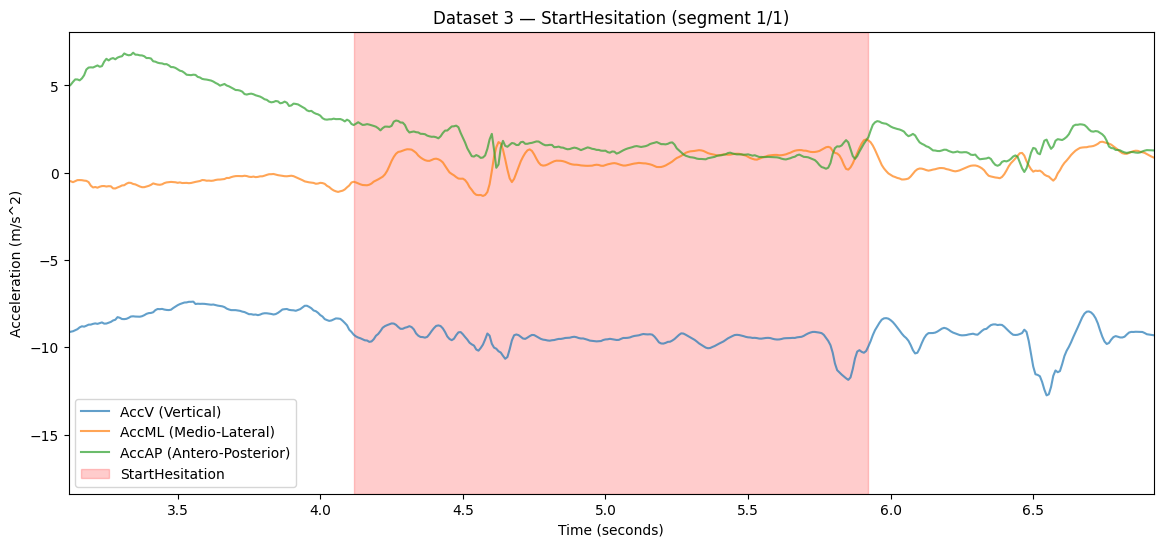

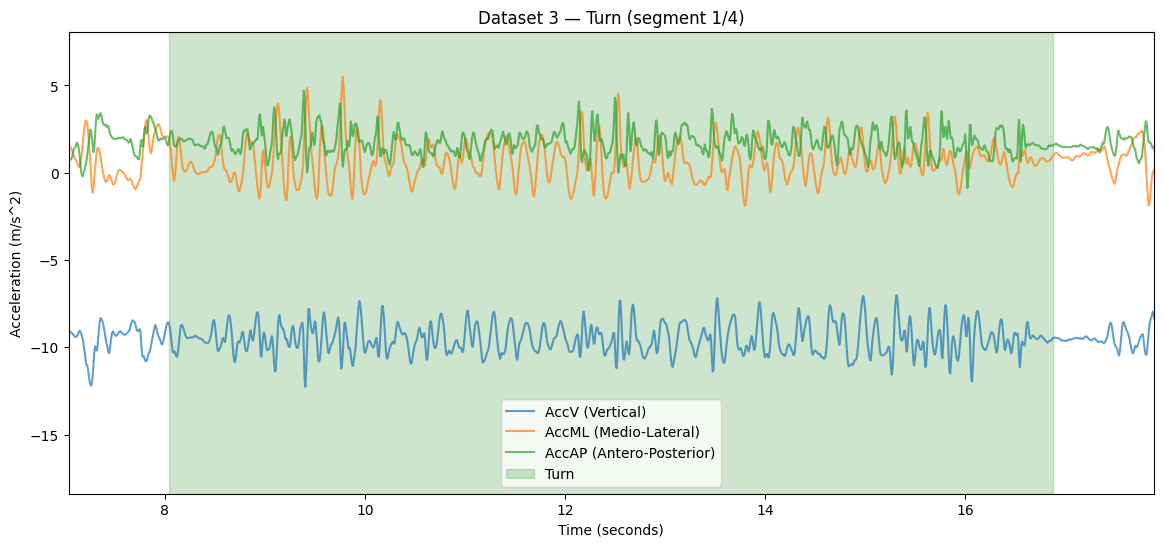

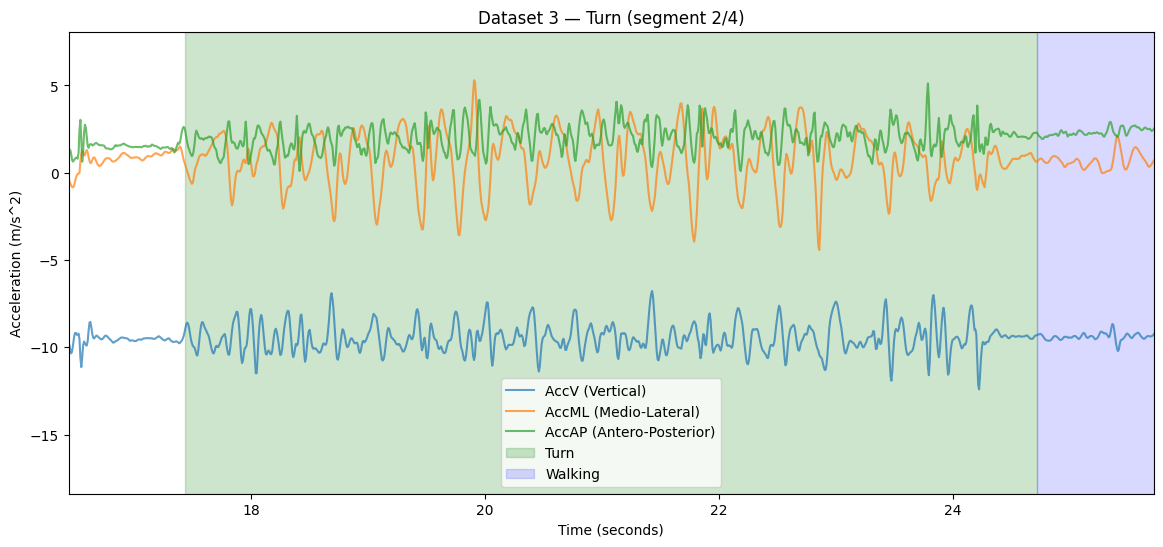

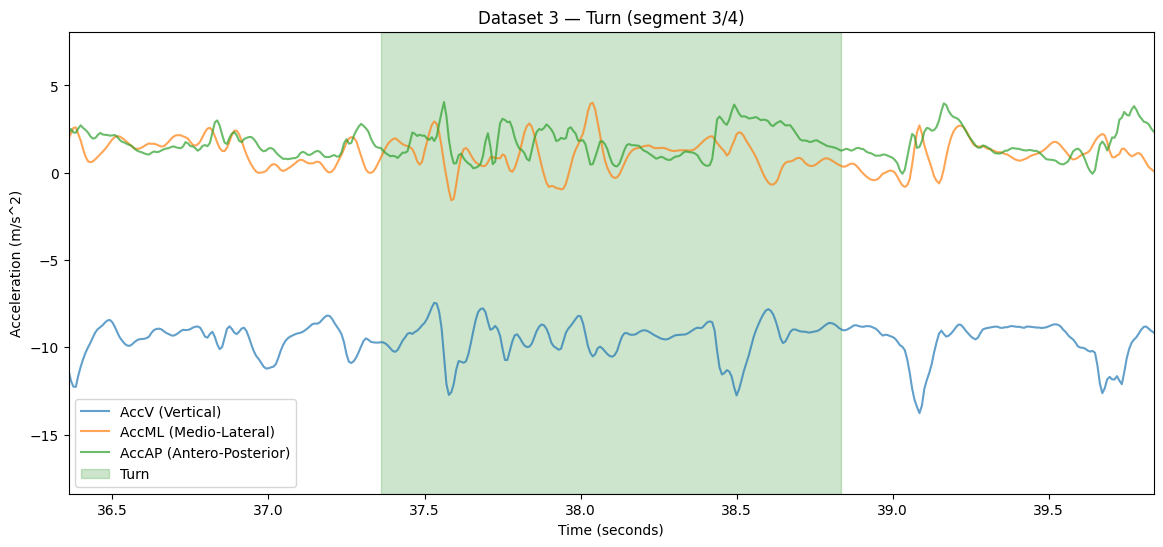

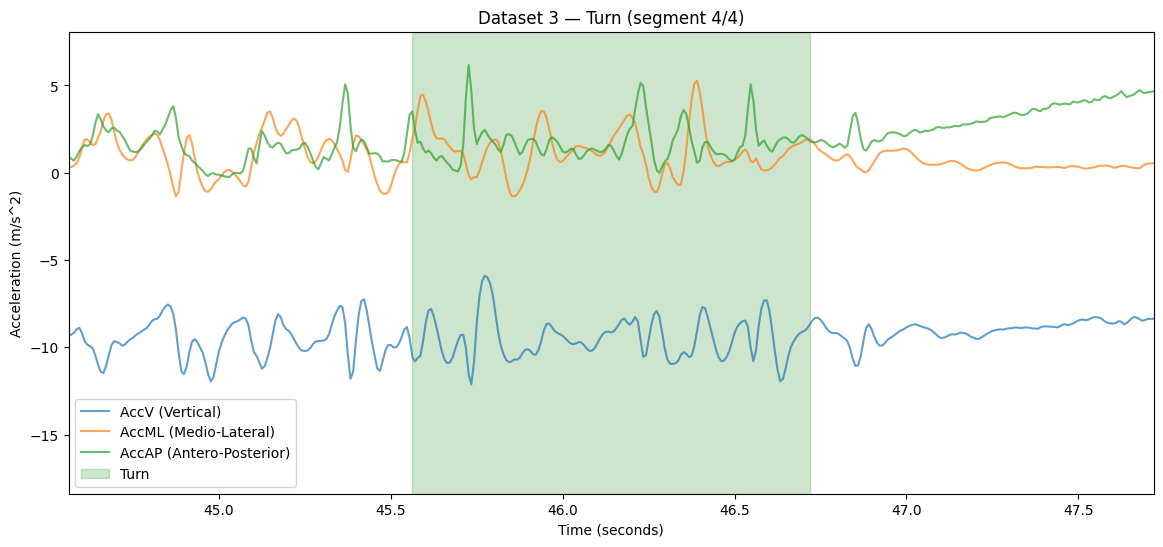

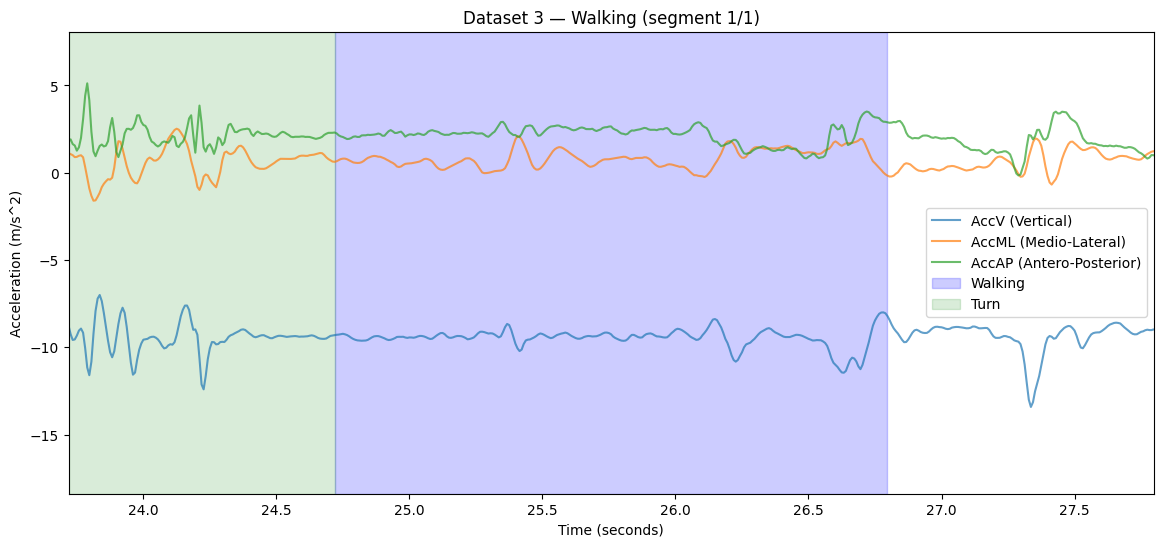

In [9]:
plot_zoomed_all_events(
    df_3,
    events=("StartHesitation", "Turn", "Walking"),
    pad_seconds=1.0,
    title_prefix="Dataset 3"
)

In [10]:
# (for plot 2 - delete word in paranthesis) def find_segments(time, s):
#     s = s.fillna(0).astype(int)
#     segs, in_evt, start = [], False, None
#     for t, v in zip(time, s):
#         if v and not in_evt: in_evt, start = True, t
#         elif not v and in_evt: in_evt, segs = False, segs+[(start, t)]
#     if in_evt: segs.append((start, float(time.iloc[-1])))
#     return segs

# time = df_3["Time"]/128.0 if "Time_sec" not in df_3.columns else df_3["Time_sec"]

# for event in ["StartHesitation", "Walking"]:
#     for i, (s, e) in enumerate(find_segments(time, df_3[event])):
#         plot_zoomed_all_events(
#             df_3,
#             event_col=event,
#             pad_seconds=0.6,
#             title=f"Dataset 3 — {event} segment #{i+1}"
#     )

In [11]:
def compute_magnitude(df):
    return np.sqrt(df["AccV"]**2 + df["AccML"]**2 + df["AccAP"]**2)

In [12]:
# Function to plot magnitude with shaded event regions
def plot_magnitude_with_events(df, title):
    time = df["Time"].values / 128  # Convert to seconds
    magnitude = compute_magnitude(df)

    plt.figure(figsize=(12, 5))
    plt.plot(time, magnitude, label="Acceleration Magnitude", color="blue", alpha=0.7)

    # Shade event regions
    for event, color in zip(["StartHesitation", "Turn", "Walking"],
                            ["red", "green", "blue"]):
        if event in df.columns:
            in_event = False
            start_time = None
            for i, val in enumerate(df[event].values):
                if val == 1 and not in_event:
                    in_event = True
                    start_time = time[i]
                elif val == 0 and in_event:
                    in_event = False
                    plt.axvspan(start_time, time[i], color=color, alpha=0.3, label=event)
            # If event goes until the end of the recording
            if in_event:
                plt.axvspan(start_time, time[-1], color=color, alpha=0.3, label=event)

    # Make legend unique (avoid duplicates when multiple spans exist)
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())

    plt.xlabel("Time (seconds)")
    plt.ylabel("Magnitude")
    plt.title(title)
    plt.show()

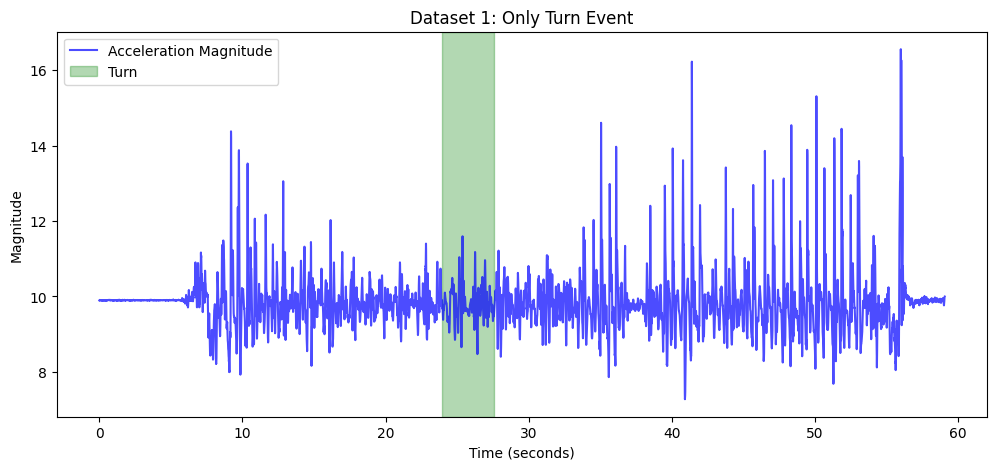

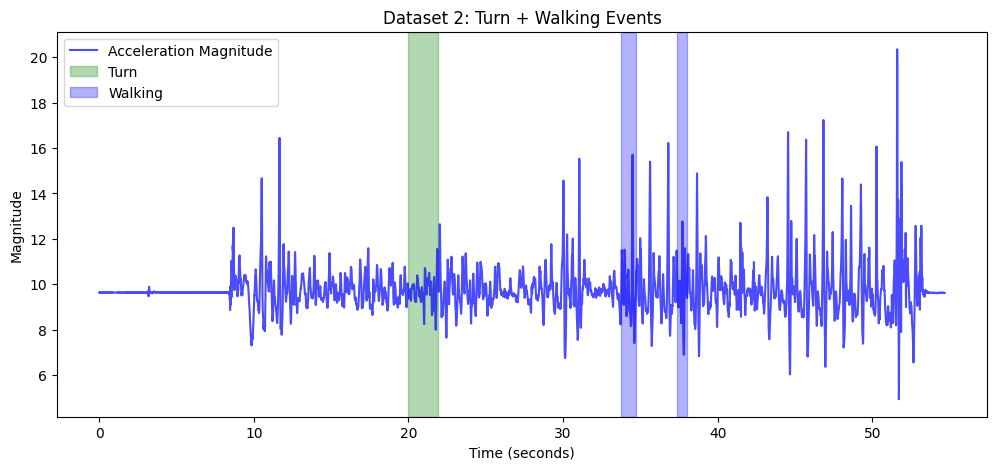

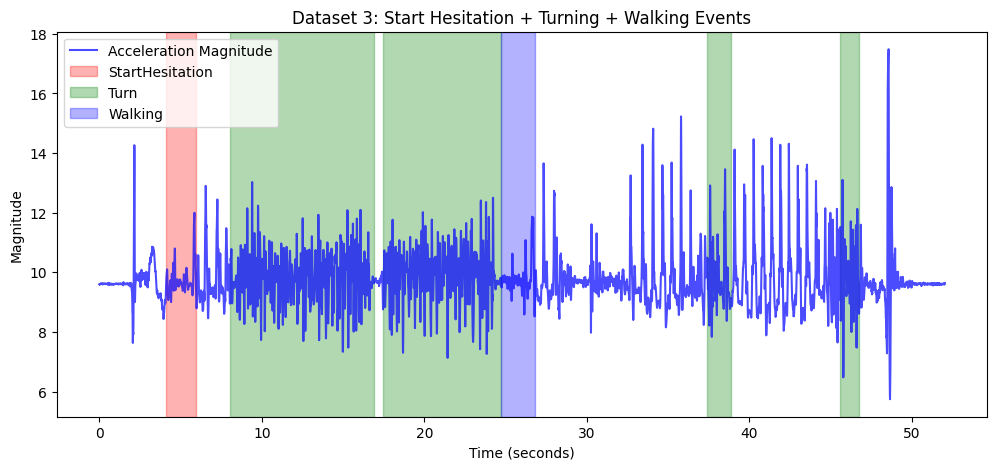

In [13]:
plot_magnitude_with_events(df_1, "Dataset 1: Only Turn Event")
plot_magnitude_with_events(df_2, "Dataset 2: Turn + Walking Events")
plot_magnitude_with_events(df_3, "Dataset 3: Start Hesitation + Turning + Walking Events")

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# ---- 1) Vector magnitude (skip if you already have compute_magnitude) ----
def compute_magnitude(df, cols=("AccV","AccML","AccAP")):
    a = df[list(cols)].to_numpy(dtype=float)
    return np.linalg.norm(a, axis=1)  # m/s^2

# ---- 2) RMS over sliding windows ----
def rms_over_windows(x, fs, win_sec=4.0, hop_sec=0.1):
    N = int(win_sec*fs)
    step = int(hop_sec*fs)
    rms_vals = []
    centers = []
    for start in range(0, len(x) - N + 1, step):
        w = x[start:start+N]
        rms_vals.append(np.sqrt(np.mean(w*w)))
        centers.append(start + N//2)
    return np.array(centers), np.array(rms_vals)

# ---- 3) Histogram plotting ----
def plot_rms_histogram(rms_vals, bins=60, title="RMS histogram"):
    plt.figure(figsize=(8,5))
    plt.hist(rms_vals, bins=bins, density=True, alpha=0.8)
    plt.xlabel("RMS acceleration (m/s²)")
    plt.ylabel("Density")
    plt.title(title)
    plt.show()

# ---- 4a) Simple starting guess via percentiles ----
def percentile_threshold_guess(rms_vals, low_pct=30, high_pct=70):
    T_low  = np.percentile(rms_vals, low_pct)
    T_high = np.percentile(rms_vals, high_pct)
    return float(T_low), float(T_high)

# ---- 4b) Auto-suggested “valleys” between bumps (no external libs) ----
def suggest_thresholds_from_histogram(rms_vals, bins=60, smooth_k=7):
    # histogram
    counts, edges = np.histogram(rms_vals, bins=bins)
    # simple smoothing
    kernel = np.ones(smooth_k)/smooth_k
    sm = np.convolve(counts, kernel, mode="same")

    # find local maxima (peaks)
    peaks = []
    for i in range(1, len(sm)-1):
        if sm[i] > sm[i-1] and sm[i] > sm[i+1]:
            peaks.append(i)

    # if there are 2–3 clear peaks (standing / FOG / walking), pick valleys between them
    if len(peaks) >= 2:
        peaks = sorted(peaks, key=lambda i: sm[i], reverse=True)[:3]          # keep strongest 2–3
        peaks.sort()                                                           # sort left→right
        valleys = []
        for i in range(len(peaks)-1):
            left, right = peaks[i], peaks[i+1]
            j = left + np.argmin(sm[left:right+1])                             # min between peaks
            valleys.append(j)
        # Convert valley bin indices to x values (bin centers)
        bin_centers = 0.5*(edges[:-1] + edges[1:])
        if len(valleys) == 1:
            return float(bin_centers[valleys[0]]), None
        elif len(valleys) >= 2:
            return float(bin_centers[valleys[0]]), float(bin_centers[valleys[1]])
    # fallback: use percentiles
    return percentile_threshold_guess(rms_vals)

# ---- 5) One-stop function: compute RMS, plot histogram, overlay thresholds ----
def histogram_and_thresholds(df, fs=128, win_sec=4.0, hop_sec=0.1, bins=60,
                             use_auto_valleys=True, low_pct=30, high_pct=70):
    mag = compute_magnitude(df)  # or use your compute_magnitude(df)
    _, rms_vals = rms_over_windows(mag, fs=fs, win_sec=win_sec, hop_sec=hop_sec)

    # thresholds
    if use_auto_valleys:
        T_low, T_high = suggest_thresholds_from_histogram(rms_vals, bins=bins)
        # If only one valley found, seed the second from percentiles
        if T_high is None:
            _, T_high = percentile_threshold_guess(rms_vals, low_pct, high_pct)
    else:
        T_low, T_high = percentile_threshold_guess(rms_vals, low_pct, high_pct)

    # plot histogram with lines
    plt.figure(figsize=(8,5))
    plt.hist(rms_vals, bins=bins, density=True, alpha=0.8)
    if T_low is not None:
        plt.axvline(T_low, linestyle="--", linewidth=2, label=f"Low ≈ {T_low:.2f}")
    if T_high is not None:
        plt.axvline(T_high, linestyle="--", linewidth=2, label=f"High ≈ {T_high:.2f}")
    plt.xlabel("RMS acceleration (m/s²)")
    plt.ylabel("Density")
    plt.title("RMS histogram with threshold suggestions")
    plt.legend()
    plt.show()

    print(f"Suggested thresholds → Low: {T_low:.3f}, High: {T_high:.3f}")
    return T_low, T_high


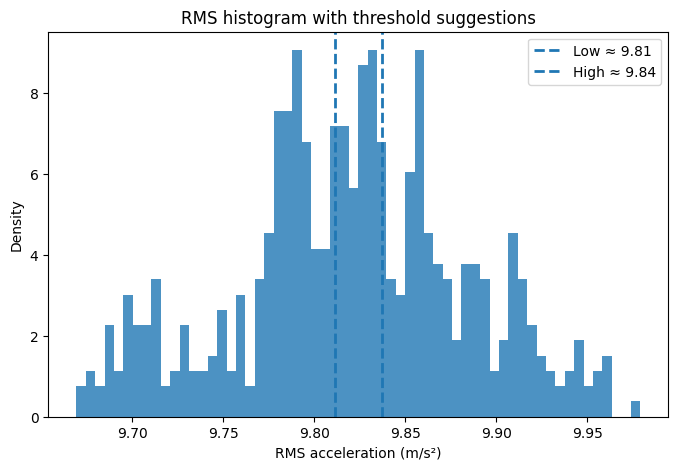

Suggested thresholds → Low: 9.811, High: 9.837


In [15]:
T_low, T_high = histogram_and_thresholds(
    df_3,             # your dataframe
    fs=128,         # sampling rate; change if different
    win_sec=4.0,    # 4-second RMS windows
    hop_sec=0.1,    # hop of 0.1s
    bins=60,        # histogram bins
    use_auto_valleys=True  # try to find valleys between bumps
)

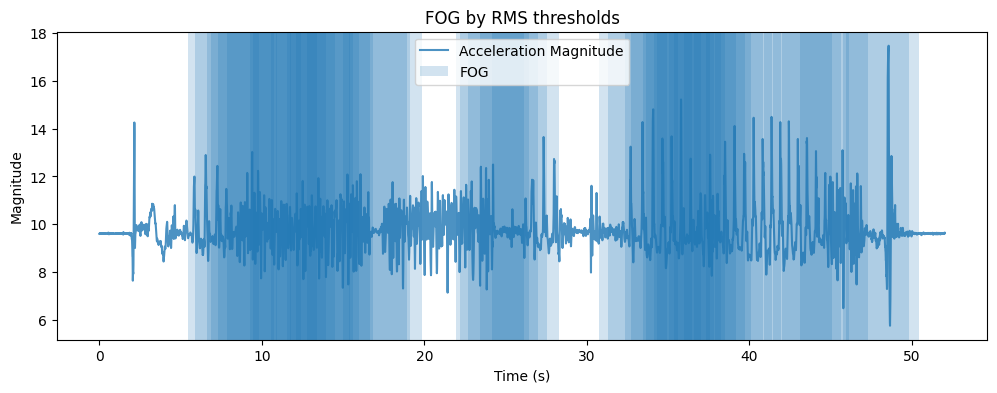

In [16]:
mag = compute_magnitude(df_3)
centers, rms_vals = rms_over_windows(mag, fs=128, win_sec=4.0, hop_sec=0.1)

# FOG if between thresholds
fog = ((rms_vals >= T_low) & (rms_vals <= T_high)).astype(int)

# Simple overlay on magnitude to sanity-check
time_sec = (df_3['Time'] / 128.0).to_numpy()          # adjust if your time is already in seconds
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.plot(time_sec, mag, label='Acceleration Magnitude', alpha=0.8)

halfwin = 4.0/2
start = None
for c, s in zip(centers, fog):
    t = c/128.0
    if s and start is None:
        start = t - halfwin
    if (not s) and (start is not None):
        plt.axvspan(max(start, time_sec[0]), t + halfwin, alpha=0.2, label='FOG')
        start = None
if start is not None:
    plt.axvspan(max(start, time_sec[0]), time_sec[-1], alpha=0.2, label='FOG')

plt.xlabel('Time (s)'); plt.ylabel('Magnitude'); plt.title('FOG by RMS thresholds')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(dict(zip(labels, handles)).values(), dict(zip(labels, handles)).keys())
plt.show()

In [17]:
def rms_ac_over_windows(x, fs, win_sec=4.0, hop_sec=0.1):
    N = int(win_sec*fs)
    step = int(hop_sec*fs)
    rms_vals, centers = [], []
    for start in range(0, len(x) - N + 1, step):
        w = x[start:start+N]
        w0 = w - w.mean()                  # remove gravity / offset (AC component)
        rms_vals.append((np.mean(w0*w0))**0.5)
        centers.append(start + N//2)
    return np.array(centers), np.array(rms_vals)

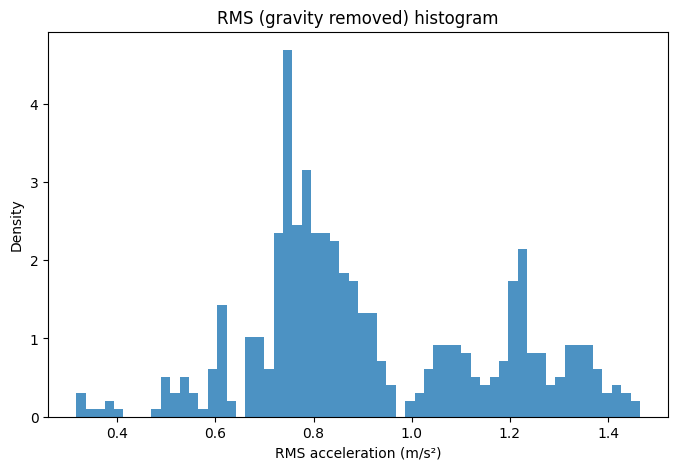

Suggested thresholds (AC-RMS) → Low: 0.996, High: 1.130


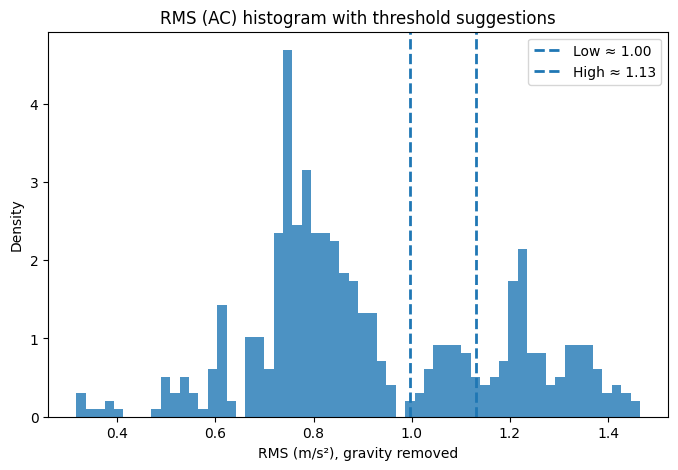

In [18]:
mag = compute_magnitude(df_3)                  # or whatever your df is called
centers, rms_ac = rms_ac_over_windows(mag, fs=128, win_sec=4.0, hop_sec=0.1)

# Make the histogram
plot_rms_histogram(rms_ac, bins=60, title="RMS (gravity removed) histogram")

# Suggest thresholds from the histogram’s valleys
T_low, T_high = suggest_thresholds_from_histogram(rms_ac, bins=60)
print(f"Suggested thresholds (AC-RMS) → Low: {T_low:.3f}, High: {T_high:.3f}")

# (optional) visualize thresholds on the histogram
plt.figure(figsize=(8,5))
plt.hist(rms_ac, bins=60, density=True, alpha=0.8)
plt.axvline(T_low,  linestyle="--", linewidth=2, label=f"Low ≈ {T_low:.2f}")
plt.axvline(T_high, linestyle="--", linewidth=2, label=f"High ≈ {T_high:.2f}")
plt.xlabel("RMS (m/s²), gravity removed"); plt.ylabel("Density")
plt.title("RMS (AC) histogram with threshold suggestions"); plt.legend(); plt.show()

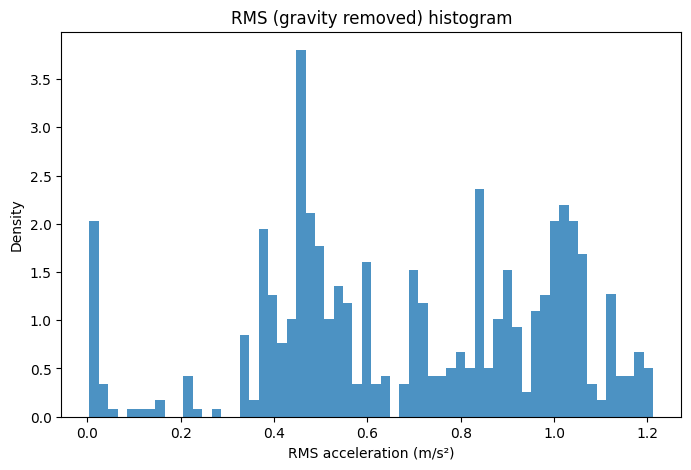

Suggested thresholds (AC-RMS) → Low: 0.457, High: 0.618


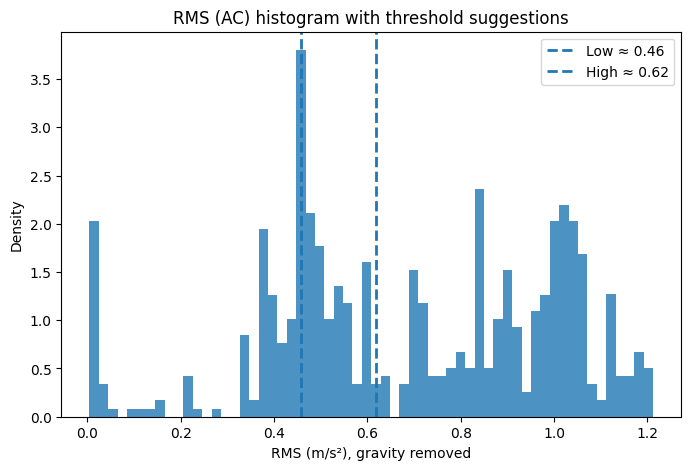

In [19]:
mag = compute_magnitude(df_1)                  # or whatever your df is called
centers, rms_ac = rms_ac_over_windows(mag, fs=128, win_sec=4.0, hop_sec=0.1)

# Make the histogram
plot_rms_histogram(rms_ac, bins=60, title="RMS (gravity removed) histogram")

# Suggest thresholds from the histogram’s valleys
T_low, T_high = suggest_thresholds_from_histogram(rms_ac, bins=60)
print(f"Suggested thresholds (AC-RMS) → Low: {T_low:.3f}, High: {T_high:.3f}")

# (optional) visualize thresholds on the histogram
plt.figure(figsize=(8,5))
plt.hist(rms_ac, bins=60, density=True, alpha=0.8)
plt.axvline(T_low,  linestyle="--", linewidth=2, label=f"Low ≈ {T_low:.2f}")
plt.axvline(T_high, linestyle="--", linewidth=2, label=f"High ≈ {T_high:.2f}")
plt.xlabel("RMS (m/s²), gravity removed"); plt.ylabel("Density")
plt.title("RMS (AC) histogram with threshold suggestions"); plt.legend(); plt.show()

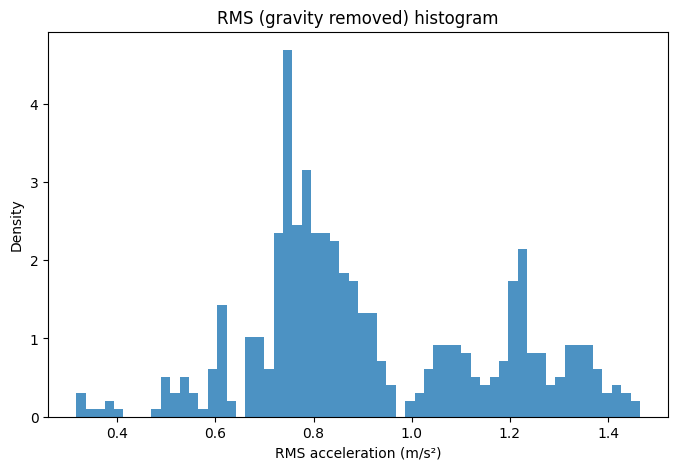

Suggested thresholds (AC-RMS) → Low: 0.996, High: 1.130


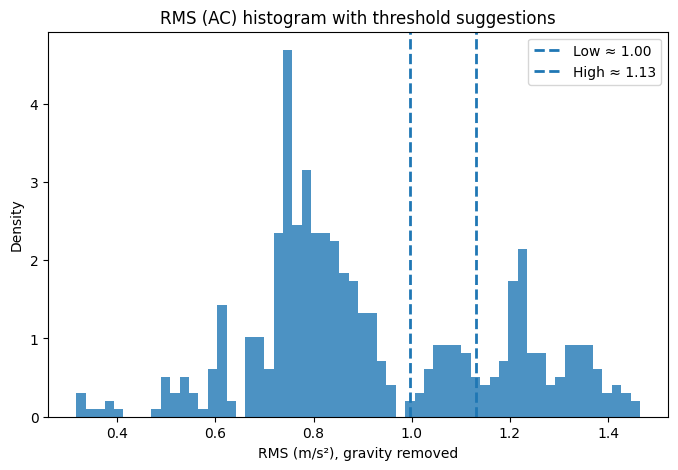

In [20]:
mag = compute_magnitude(df_3)                  # or whatever your df is called
centers, rms_ac = rms_ac_over_windows(mag, fs=128, win_sec=4.0, hop_sec=0.1)

# Make the histogram
plot_rms_histogram(rms_ac, bins=60, title="RMS (gravity removed) histogram")

# Suggest thresholds from the histogram’s valleys
T_low, T_high = suggest_thresholds_from_histogram(rms_ac, bins=60)
print(f"Suggested thresholds (AC-RMS) → Low: {T_low:.3f}, High: {T_high:.3f}")

# (optional) visualize thresholds on the histogram
plt.figure(figsize=(8,5))
plt.hist(rms_ac, bins=60, density=True, alpha=0.8)
plt.axvline(T_low,  linestyle="--", linewidth=2, label=f"Low ≈ {T_low:.2f}")
plt.axvline(T_high, linestyle="--", linewidth=2, label=f"High ≈ {T_high:.2f}")
plt.xlabel("RMS (m/s²), gravity removed"); plt.ylabel("Density")
plt.title("RMS (AC) histogram with threshold suggestions"); plt.legend(); plt.show()